Standard deviation of percentage change: 0.7291


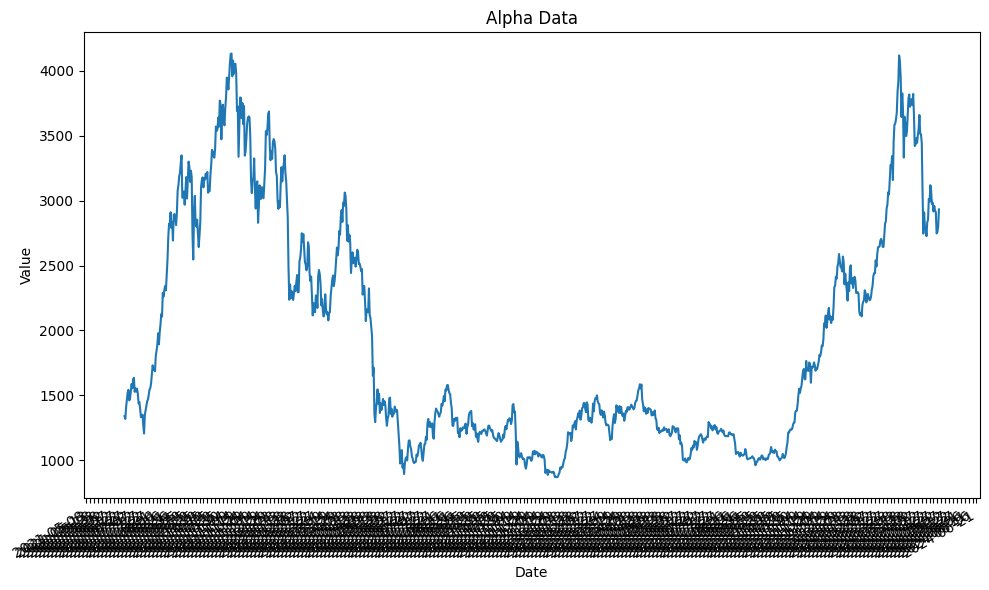

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Read data from the file
data = []
with open('/Users/arguiot/Downloads/alpha', 'r') as file:
    for line in file:
        date_str, value_str = line.strip().split()
        date = datetime.strptime(date_str, '%Y-%m-%d')
        value = float(value_str)
        data.append({'Date': date, 'Value': value})

# Create a pandas DataFrame
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Calculate percentage change and print standard deviation
pct_change_std = df['Value'].pct_change().std() * np.sqrt(365)
print(f"Standard deviation of percentage change: {pct_change_std:.4f}")

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'])

# Set the x-axis format to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Alpha Data')

# Display the plot
plt.tight_layout()
plt.show()